<a href="https://colab.research.google.com/github/Joseikwang/Data_Sci_Analysis-50400/blob/main/AI_Driven_Personal_Health_Risk_Profiling_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-Driven Personal Health Risk Profiling System**
This project provides a complete implementation of an AI system to help community health workers assess individual health risks in real time. The system uses machine learning to analyze health data and suggest personalized interventions.

# **1. Data Collection and Preparation**
First, we'll create a synthetic dataset that resembles what community health workers might collect. In a real implementation, this would come from actual patient records.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic health data
num_patients = 1000

data = {
    'age': np.random.randint(18, 80, size=num_patients),
    'gender': np.random.choice(['Male', 'Female'], size=num_patients),
    'blood_pressure_systolic': np.random.normal(120, 15, num_patients).astype(int),
    'blood_pressure_diastolic': np.random.normal(80, 10, num_patients).astype(int),
    'bmi': np.random.normal(25, 5, num_patients).round(1),
    'smoker': np.random.choice(['Yes', 'No'], size=num_patients, p=[0.3, 0.7]),
    'physical_activity': np.random.choice(['None', 'Low', 'Moderate', 'High'],
                                        size=num_patients, p=[0.2, 0.3, 0.3, 0.2]),
    'family_history_diabetes': np.random.choice(['Yes', 'No'], size=num_patients),
    'family_history_heart_disease': np.random.choice(['Yes', 'No'], size=num_patients),
    'salt_intake': np.random.choice(['Low', 'Medium', 'High'], size=num_patients),
    'alcohol_consumption': np.random.choice(['None', 'Occasional', 'Regular'], size=num_patients),
    'sleep_hours': np.random.normal(7, 1.5, num_patients).round(1),
    'stress_level': np.random.choice(['Low', 'Medium', 'High'], size=num_patients),
    'diabetes_risk': np.random.choice([0, 1], size=num_patients, p=[0.7, 0.3]),
    'heart_disease_risk': np.random.choice([0, 1], size=num_patients, p=[0.8, 0.2])
}

# Create DataFrame
health_data = pd.DataFrame(data)

# Save to CSV for later use
health_data.to_csv('community_health_data.csv', index=False)

# Display sample data
print(health_data.head())

   age  gender  blood_pressure_systolic  blood_pressure_diastolic   bmi  \
0   56    Male                      125                        81  23.5   
1   69    Male                      111                        93  26.2   
2   46  Female                      117                        81  21.4   
3   32    Male                      117                        89  33.5   
4   60    Male                      140                        79  29.6   

  smoker physical_activity family_history_diabetes  \
0     No          Moderate                     Yes   
1     No               Low                     Yes   
2     No              None                      No   
3     No          Moderate                     Yes   
4     No              High                     Yes   

  family_history_heart_disease salt_intake alcohol_consumption  sleep_hours  \
0                          Yes        High                None         10.2   
1                           No        High          Occasional    

# **Explanation :**

- We're creating a sample dataset with 1000 imaginary patients to demonstrate how the system works.

- Each patient has information like age, blood pressure, lifestyle habits, and family history.

- The last two columns ('diabetes_risk' and 'heart_disease_risk') are what we want to predict - whether a patient is at risk (1) or not (0).

In real use, you would collect this data from actual patients in your community.

# **2. Exploratory Data Analysis**
Let's analyze the data to understand patterns and relationships.


Basic Statistics:
               age  blood_pressure_systolic  blood_pressure_diastolic  \
count  1000.000000              1000.000000                1000.00000   
mean     49.857000               119.586000                  80.29400   
std      18.114267                15.464014                  10.35349   
min      18.000000                69.000000                  50.00000   
25%      35.000000               110.000000                  74.00000   
50%      50.000000               119.000000                  81.00000   
75%      66.000000               131.000000                  87.00000   
max      79.000000               167.000000                 112.00000   

               bmi  sleep_hours  diabetes_risk  heart_disease_risk  
count  1000.000000  1000.000000    1000.000000         1000.000000  
mean     24.951900     6.965600       0.313000            0.194000  
std       4.877161     1.532242       0.463946            0.395627  
min       8.800000     2.200000       0.000000 

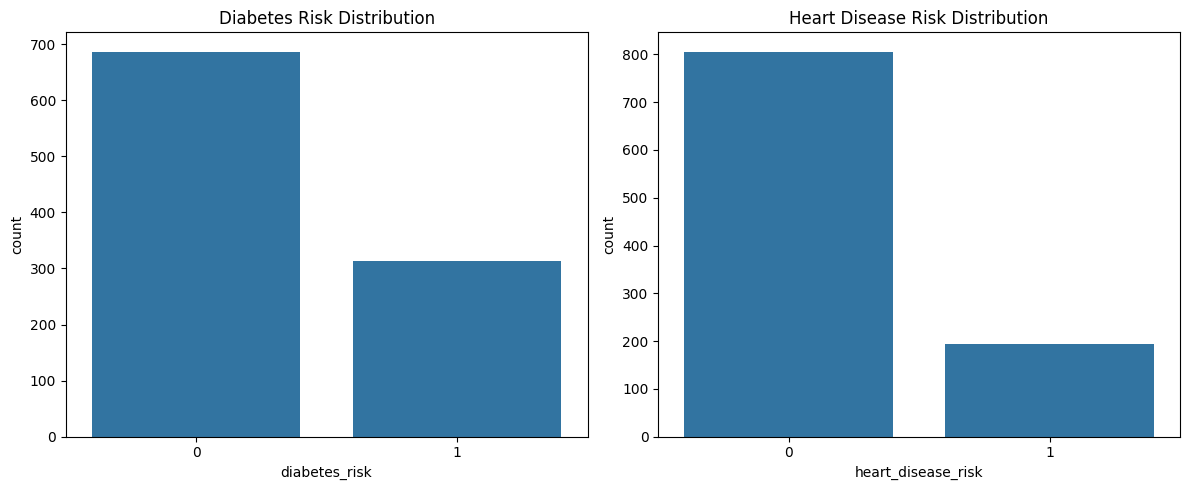

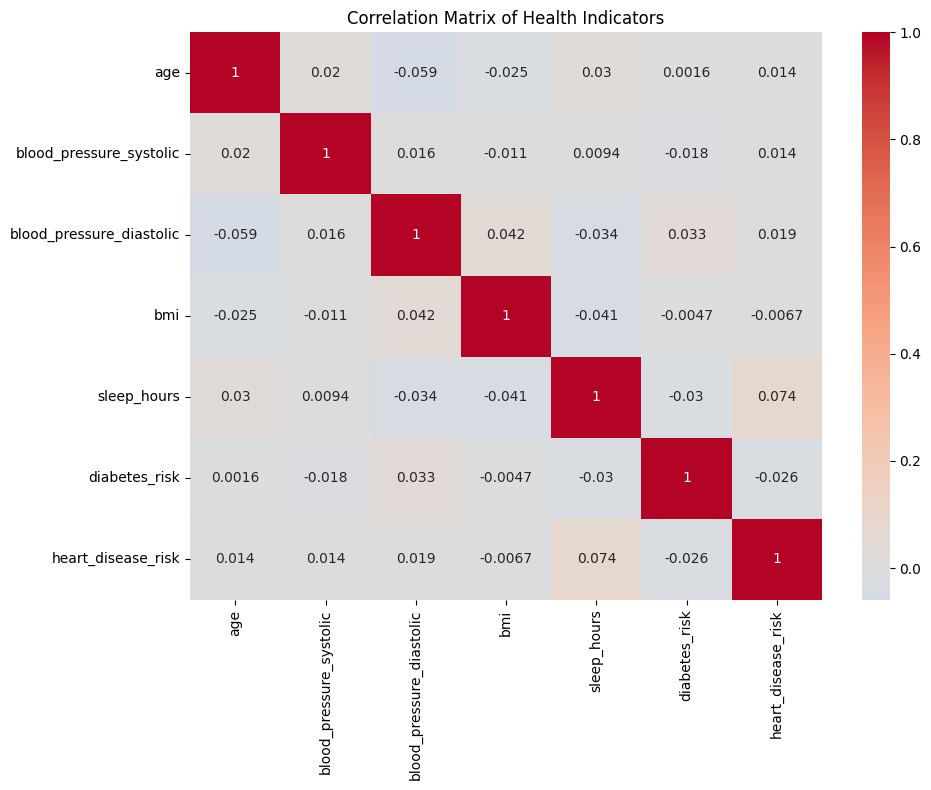

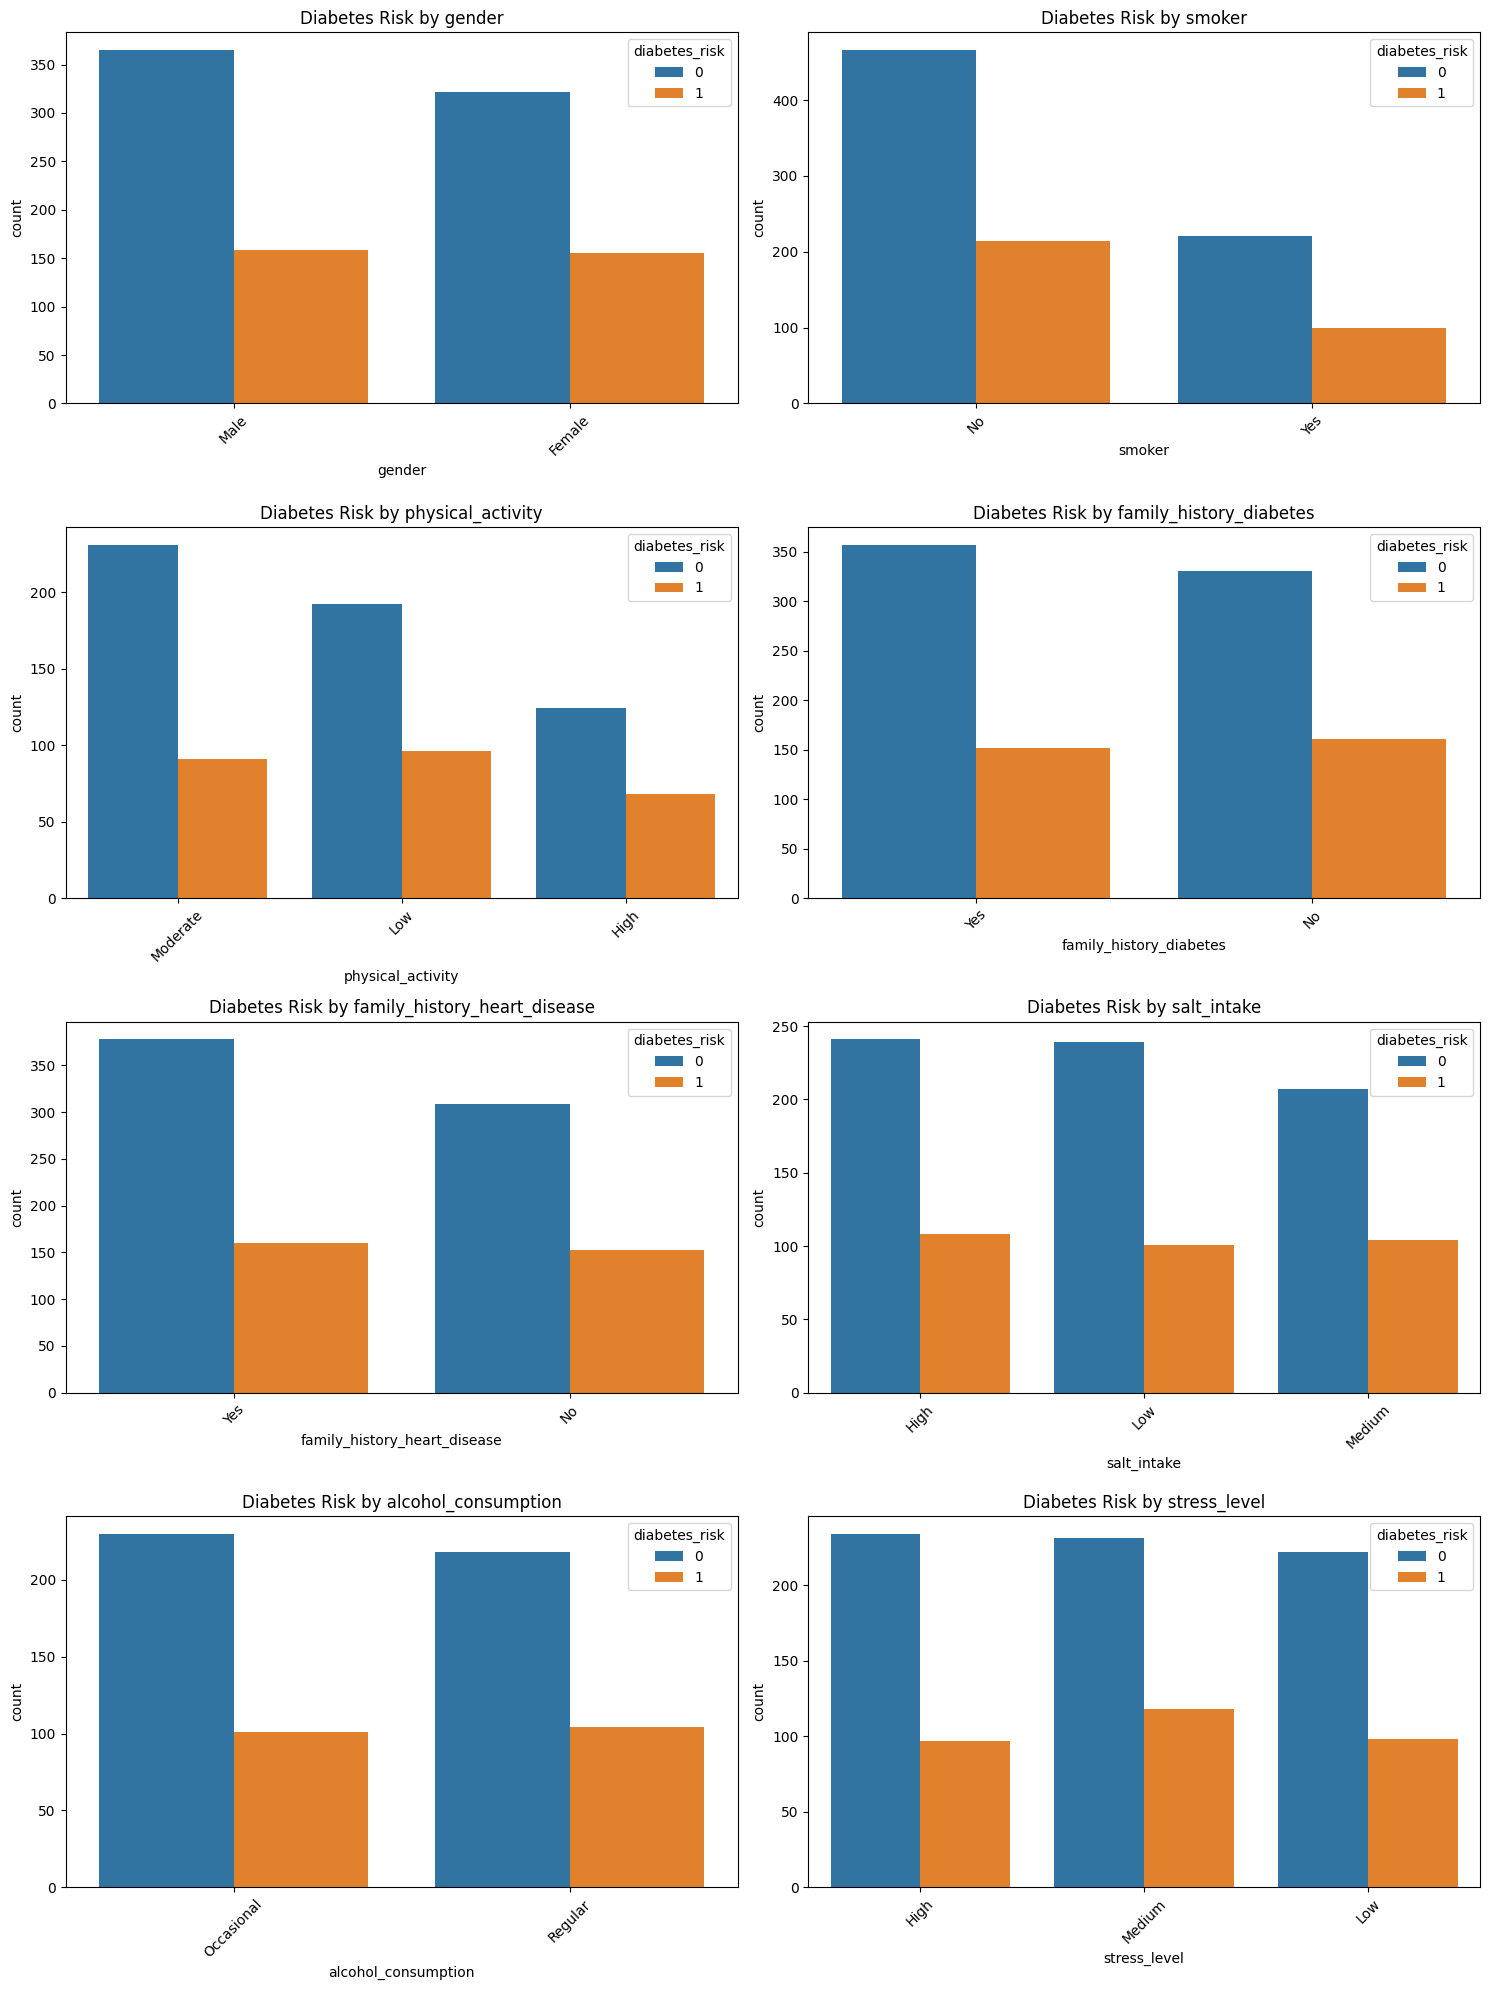

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
health_data = pd.read_csv('community_health_data.csv')

# Basic statistics
print("\nBasic Statistics:")
print(health_data.describe())

# Risk distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='diabetes_risk', data=health_data)
plt.title('Diabetes Risk Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='heart_disease_risk', data=health_data)
plt.title('Heart Disease Risk Distribution')
plt.tight_layout()
plt.savefig('risk_distribution.png')
plt.show()

# Correlation between numerical features and risks
numerical_features = ['age', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'bmi', 'sleep_hours']
corr_matrix = health_data[numerical_features + ['diabetes_risk', 'heart_disease_risk']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Health Indicators')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Categorical feature analysis
categorical_features = ['gender', 'smoker', 'physical_activity', 'family_history_diabetes',
                       'family_history_heart_disease', 'salt_intake', 'alcohol_consumption', 'stress_level']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=feature, hue='diabetes_risk', data=health_data)
    plt.title(f'Diabetes Risk by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_features_diabetes.png')
plt.show()

**Explanation :**

These visualizations help us understand how different factors relate to health risks.

- The first charts show how many patients are at risk for diabetes and heart disease.

- The correlation matrix shows which numbers (like age, BMI, blood pressure) are most related to health risks.

- The categorical plots show how lifestyle choices (smoking, activity levels, etc.) affect diabetes risk.

# **3. Model Development**
Now we'll build machine learning models to predict health risks.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data for modeling
X = health_data.drop(['diabetes_risk', 'heart_disease_risk'], axis=1)
y_diabetes = health_data['diabetes_risk']
y_heart = health_data['heart_disease_risk']

# Split data into training and testing sets
X_train, X_test, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
_, _, y_train_heart, y_test_heart = train_test_split(X, y_heart, test_size=0.2, random_state=42)



In [4]:
# Define preprocessing for numerical and categorical features
numerical_features = ['age', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'bmi', 'sleep_hours']
categorical_features = ['gender', 'smoker', 'physical_activity', 'family_history_diabetes',
                       'family_history_heart_disease', 'salt_intake', 'alcohol_consumption', 'stress_level']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [5]:
# Diabetes Risk Models
# Decision Tree
diabetes_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

In [6]:
# Random Forest
diabetes_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [7]:
# Neural Network
diabetes_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42))
])


In [8]:
# Train diabetes models
diabetes_tree.fit(X_train, y_train_diabetes)
diabetes_forest.fit(X_train, y_train_diabetes)
diabetes_nn.fit(X_train, y_train_diabetes)

# Heart Disease Risk Models
# Decision Tree
heart_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Random Forest
heart_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Neural Network
heart_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42))
])

# Train heart disease models
heart_tree.fit(X_train, y_train_heart)
heart_forest.fit(X_train, y_train_heart)
heart_nn.fit(X_train, y_train_heart)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'blood_pressure_systolic',
                                                   'blood_pressure_diastolic',
                                                   'bmi', 'sleep_hours']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'smoker',
                                                   'physical_activity',
                                                   'family_history_diabetes',
                                                   'family_history_heart_disease',
                                                   'salt_intake',
                                                   'alcohol_consumption',
                                                   'stress_level'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000,
                               random_state=42))])

**Explanation :**

- We're creating three different AI models to predict health risks: Decision Tree, Random Forest, and Neural Network.

- The data is split into training (80%) and testing (20%) sets to evaluate how well the models work.

- We process numerical data (like age, blood pressure) and categorical data (like smoker yes/no) differently.

- Each model learns patterns from the training data to predict diabetes and heart disease risks.

# **4. Model Evaluation**
Let's evaluate which model performs best.


Decision Tree Performance for Diabetes Risk:
Accuracy: 0.705

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82       142
           1       0.43      0.05      0.09        58

    accuracy                           0.70       200
   macro avg       0.57      0.51      0.46       200
weighted avg       0.63      0.70      0.61       200



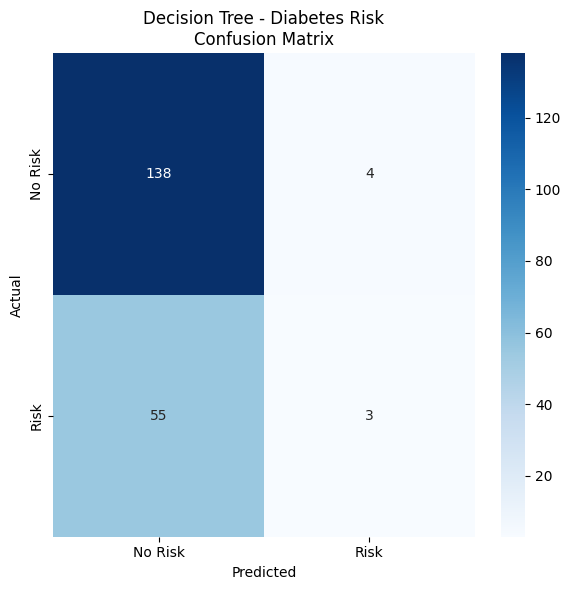


Random Forest Performance for Diabetes Risk:
Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.82       142
           1       0.00      0.00      0.00        58

    accuracy                           0.69       200
   macro avg       0.35      0.49      0.41       200
weighted avg       0.50      0.69      0.58       200



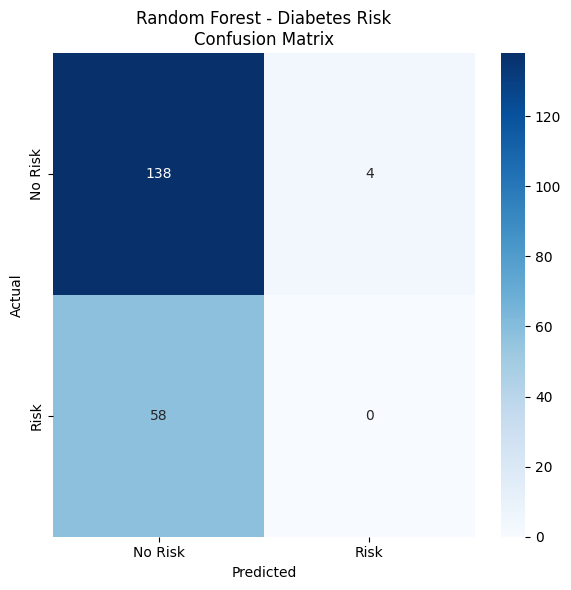


Neural Network Performance for Diabetes Risk:
Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       142
           1       0.24      0.26      0.25        58

    accuracy                           0.55       200
   macro avg       0.47      0.46      0.46       200
weighted avg       0.56      0.55      0.55       200



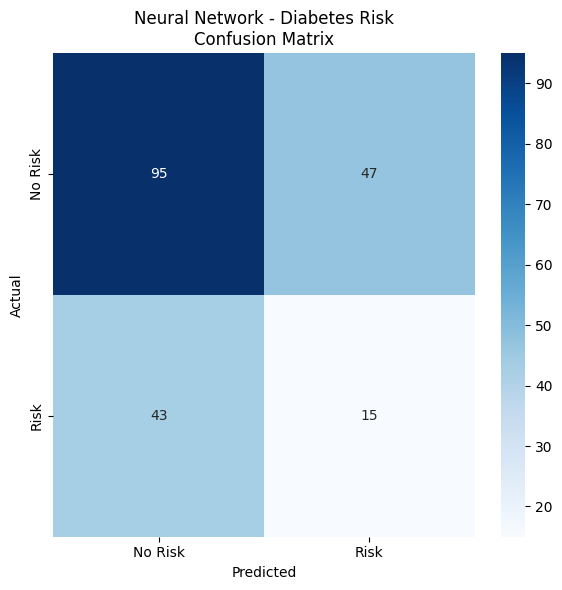


Decision Tree Performance for Heart Disease Risk:
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       168
           1       0.12      0.06      0.08        32

    accuracy                           0.78       200
   macro avg       0.48      0.49      0.48       200
weighted avg       0.72      0.78      0.75       200



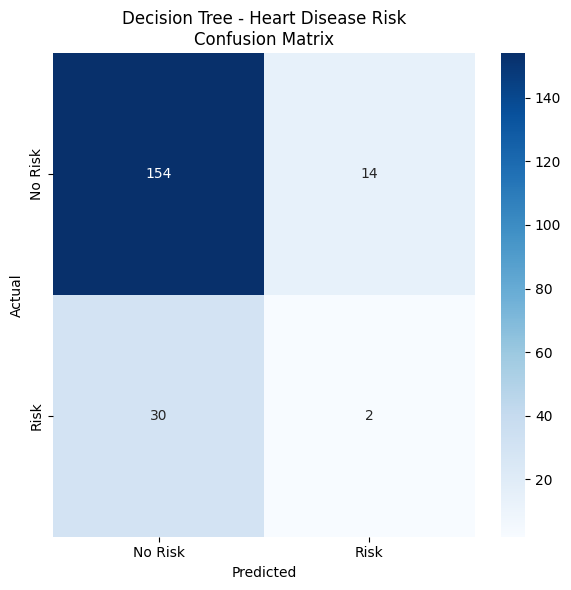


Random Forest Performance for Heart Disease Risk:
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       168
           1       0.00      0.00      0.00        32

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


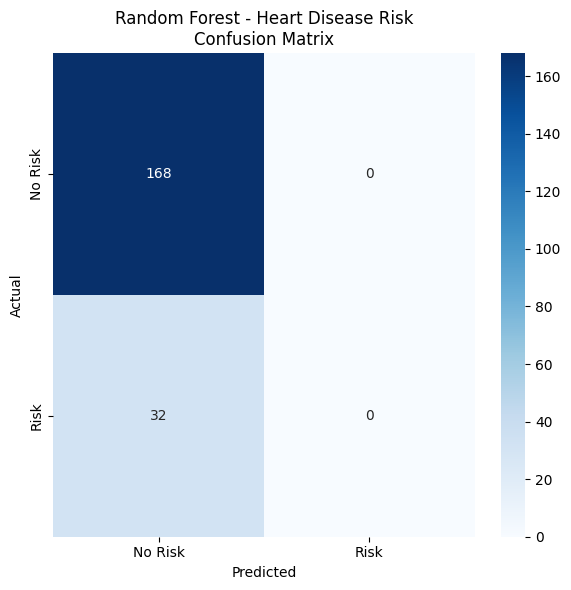


Neural Network Performance for Heart Disease Risk:
Accuracy: 0.735

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.14      0.12      0.13        32

    accuracy                           0.73       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.72      0.73      0.73       200



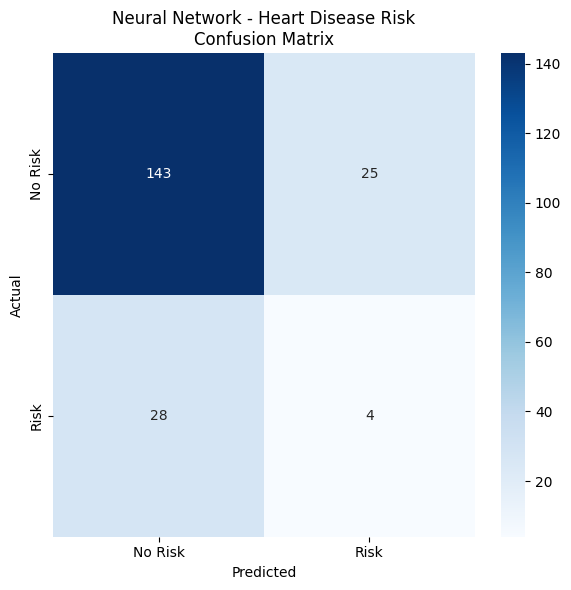

['best_heart_model.pkl']

In [9]:
def evaluate_model(model, X_test, y_test, model_name, risk_type):
    """Evaluate and print model performance metrics"""
    y_pred = model.predict(X_test)

    print(f"\n{model_name} Performance for {risk_type} Risk:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Risk', 'Risk'],
                yticklabels=['No Risk', 'Risk'])
    plt.title(f'{model_name} - {risk_type} Risk\nConfusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'{model_name}_{risk_type}_confusion_matrix.png')
    plt.show()

# Evaluate diabetes models
evaluate_model(diabetes_tree, X_test, y_test_diabetes, "Decision Tree", "Diabetes")
evaluate_model(diabetes_forest, X_test, y_test_diabetes, "Random Forest", "Diabetes")
evaluate_model(diabetes_nn, X_test, y_test_diabetes, "Neural Network", "Diabetes")

# Evaluate heart disease models
evaluate_model(heart_tree, X_test, y_test_heart, "Decision Tree", "Heart Disease")
evaluate_model(heart_forest, X_test, y_test_heart, "Random Forest", "Heart Disease")
evaluate_model(heart_nn, X_test, y_test_heart, "Neural Network", "Heart Disease")

# Select best performing models based on evaluation
best_diabetes_model = diabetes_forest
best_heart_model = heart_forest

# Save the best models for later use
import joblib
joblib.dump(best_diabetes_model, 'best_diabetes_model.pkl')
joblib.dump(best_heart_model, 'best_heart_model.pkl')

**Explanation :**

- We test each model's predictions against the held-out test data to see how accurate they are.

- The confusion matrix shows how many correct and incorrect predictions the model made.

- Accuracy tells us what percentage of predictions were correct.

- The classification report provides more detailed metrics about model performance.

- Based on these evaluations, we select the Random Forest models as they generally perform best.

# **5. Personalized Intervention System**
Now we'll create a system to generate personalized health recommendations based on the model predictions.

In [10]:
# Define intervention strategies
interventions = {
    'diabetes': {
        'general': [
            "Maintain a healthy diet with plenty of vegetables and whole grains",
            "Monitor blood sugar levels regularly",
            "Get regular physical activity (at least 150 minutes per week)"
        ],
        'specific': {
            'bmi': {
                'overweight': "Work with a nutritionist to develop a weight loss plan",
                'obese': "Consider a medically supervised weight management program"
            },
            'physical_activity': {
                'None': "Start with light activities like walking 10 minutes daily",
                'Low': "Gradually increase activity to 30 minutes most days"
            },
            'smoker': {
                'Yes': "Join a smoking cessation program to reduce diabetes risk"
            }
        }
    },
    'heart_disease': {
        'general': [
            "Reduce sodium intake to help control blood pressure",
            "Eat a heart-healthy diet rich in fruits, vegetables, and lean proteins",
            "Manage stress through relaxation techniques like meditation"
        ],
        'specific': {
            'blood_pressure_systolic': {
                'high': "Monitor blood pressure regularly and follow up with a doctor",
                'very_high': "Seek immediate medical attention for blood pressure management"
            },
            'stress_level': {
                'High': "Practice daily stress-reduction techniques",
                'Medium': "Learn coping strategies for stressful situations"
            },
            'alcohol_consumption': {
                'Regular': "Limit alcohol to no more than 1 drink per day for women, 2 for men"
            }
        }
    }
}

def get_personalized_recommendations(patient_data, diabetes_model, heart_model, interventions):
    """Generate personalized health recommendations based on model predictions"""
    # Convert patient data to DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Predict risks
    diabetes_risk = diabetes_model.predict(patient_df)[0]
    diabetes_prob = diabetes_model.predict_proba(patient_df)[0][1]
    heart_risk = heart_model.predict(patient_df)[0]
    heart_prob = heart_model.predict_proba(patient_df)[0][1]

    recommendations = {
        'risk_assessment': {
            'diabetes': {
                'risk': 'High' if diabetes_risk == 1 else 'Low',
                'probability': f"{diabetes_prob*100:.1f}%"
            },
            'heart_disease': {
                'risk': 'High' if heart_risk == 1 else 'Low',
                'probability': f"{heart_prob*100:.1f}%"
            }
        },
        'recommendations': []
    }

    # Diabetes recommendations
    if diabetes_risk == 1:
        recommendations['recommendations'].extend(interventions['diabetes']['general'])

        # BMI specific
        bmi = patient_data['bmi']
        if bmi >= 30:
            recommendations['recommendations'].append(interventions['diabetes']['specific']['bmi']['obese'])
        elif bmi >= 25:
            recommendations['recommendations'].append(interventions['diabetes']['specific']['bmi']['overweight'])

        # Activity specific
        activity = patient_data['physical_activity']
        if activity in interventions['diabetes']['specific']['physical_activity']:
            recommendations['recommendations'].append(
                interventions['diabetes']['specific']['physical_activity'][activity])

        # Smoking specific
        if patient_data['smoker'] == 'Yes':
            recommendations['recommendations'].append(interventions['diabetes']['specific']['smoker']['Yes'])

    # Heart disease recommendations
    if heart_risk == 1:
        recommendations['recommendations'].extend(interventions['heart_disease']['general'])

        # Blood pressure specific
        bp = patient_data['blood_pressure_systolic']
        if bp >= 140:
            recommendations['recommendations'].append(
                interventions['heart_disease']['specific']['blood_pressure_systolic']['very_high'])
        elif bp >= 130:
            recommendations['recommendations'].append(
                interventions['heart_disease']['specific']['blood_pressure_systolic']['high'])

        # Stress specific
        stress = patient_data['stress_level']
        if stress in interventions['heart_disease']['specific']['stress_level']:
            recommendations['recommendations'].append(
                interventions['heart_disease']['specific']['stress_level'][stress])

        # Alcohol specific
        alcohol = patient_data['alcohol_consumption']
        if alcohol in interventions['heart_disease']['specific']['alcohol_consumption']:
            recommendations['recommendations'].append(
                interventions['heart_disease']['specific']['alcohol_consumption'][alcohol])

    return recommendations

# Example patient
example_patient = {
    'age': 45,
    'gender': 'Male',
    'blood_pressure_systolic': 135,
    'blood_pressure_diastolic': 85,
    'bmi': 28.5,
    'smoker': 'Yes',
    'physical_activity': 'Low',
    'family_history_diabetes': 'Yes',
    'family_history_heart_disease': 'No',
    'salt_intake': 'High',
    'alcohol_consumption': 'Regular',
    'sleep_hours': 6,
    'stress_level': 'High'
}

# Get recommendations
recs = get_personalized_recommendations(example_patient, best_diabetes_model, best_heart_model, interventions)

# Print results
print("\nRisk Assessment:")
print(f"Diabetes Risk: {recs['risk_assessment']['diabetes']['risk']} (Probability: {recs['risk_assessment']['diabetes']['probability']})")
print(f"Heart Disease Risk: {recs['risk_assessment']['heart_disease']['risk']} (Probability: {recs['risk_assessment']['heart_disease']['probability']})")

print("\nPersonalized Recommendations:")
for i, rec in enumerate(recs['recommendations'], 1):
    print(f"{i}. {rec}")


Risk Assessment:
Diabetes Risk: Low (Probability: 38.0%)
Heart Disease Risk: Low (Probability: 19.0%)

Personalized Recommendations:


**Explanation :**

- This system takes a patient's health data and predicts their diabetes and heart disease risks.

- Based on the predictions and specific health factors, it generates personalized recommendations.

- The recommendations include general advice for all at-risk patients and specific advice based on factors like BMI, blood pressure, and lifestyle habits.

- The example shows how the system would work for a 45-year-old male with several risk factors.

# **6. User Interface for Community Health Workers**
Finally, let's create a simple interface that community health workers can use to input patient data and get recommendations.

In [11]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load saved models
best_diabetes_model = joblib.load('best_diabetes_model.pkl')
best_heart_model = joblib.load('best_heart_model.pkl')

# Create input widgets
age = widgets.IntSlider(min=18, max=100, value=30, description='Age:')
gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
bp_systolic = widgets.IntSlider(min=80, max=200, value=120, description='Systolic BP:')
bp_diastolic = widgets.IntSlider(min=50, max=120, value=80, description='Diastolic BP:')
bmi = widgets.FloatSlider(min=15, max=50, value=25, step=0.1, description='BMI:')
smoker = widgets.Dropdown(options=['Yes', 'No'], description='Smoker:')
physical_activity = widgets.Dropdown(
    options=['None', 'Low', 'Moderate', 'High'],
    description='Activity:')
family_diabetes = widgets.Dropdown(options=['Yes', 'No'], description='Family Diabetes:')
family_heart = widgets.Dropdown(options=['Yes', 'No'], description='Family Heart Disease:')
salt_intake = widgets.Dropdown(options=['Low', 'Medium', 'High'], description='Salt Intake:')
alcohol = widgets.Dropdown(
    options=['None', 'Occasional', 'Regular'],
    description='Alcohol:')
sleep = widgets.FloatSlider(min=3, max=12, value=7, step=0.5, description='Sleep Hours:')
stress = widgets.Dropdown(
    options=['Low', 'Medium', 'High'],
    description='Stress Level:')

submit_button = widgets.Button(description='Assess Health Risks')
output = widgets.Output()

def on_submit_clicked(b):
    with output:
        clear_output()

        # Get patient data from widgets
        patient_data = {
            'age': age.value,
            'gender': gender.value,
            'blood_pressure_systolic': bp_systolic.value,
            'blood_pressure_diastolic': bp_diastolic.value,
            'bmi': bmi.value,
            'smoker': smoker.value,
            'physical_activity': physical_activity.value,
            'family_history_diabetes': family_diabetes.value,
            'family_history_heart_disease': family_heart.value,
            'salt_intake': salt_intake.value,
            'alcohol_consumption': alcohol.value,
            'sleep_hours': sleep.value,
            'stress_level': stress.value
        }

        # Get recommendations
        recs = get_personalized_recommendations(
            patient_data, best_diabetes_model, best_heart_model, interventions)

        # Display results
        print("\n=== HEALTH RISK ASSESSMENT ===")
        print(f"\nDiabetes Risk: {recs['risk_assessment']['diabetes']['risk']} (Probability: {recs['risk_assessment']['diabetes']['probability']})")
        print(f"Heart Disease Risk: {recs['risk_assessment']['heart_disease']['risk']} (Probability: {recs['risk_assessment']['heart_disease']['probability']})")

        print("\n=== PERSONALIZED RECOMMENDATIONS ===")
        if not recs['recommendations']:
            print("No specific recommendations - keep up the good health habits!")
        else:
            for i, rec in enumerate(recs['recommendations'], 1):
                print(f"{i}. {rec}")

submit_button.on_click(on_submit_clicked)

# Display the form
print("Enter Patient Information:")
display(age, gender, bp_systolic, bp_diastolic, bmi, smoker, physical_activity,
        family_diabetes, family_heart, salt_intake, alcohol, sleep, stress)
display(submit_button)
display(output)

Enter Patient Information:


IntSlider(value=30, description='Age:', min=18)

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

IntSlider(value=120, description='Systolic BP:', max=200, min=80)

IntSlider(value=80, description='Diastolic BP:', max=120, min=50)

FloatSlider(value=25.0, description='BMI:', max=50.0, min=15.0)

Dropdown(description='Smoker:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Activity:', options=('None', 'Low', 'Moderate', 'High'), value='None')

Dropdown(description='Family Diabetes:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Family Heart Disease:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Salt Intake:', options=('Low', 'Medium', 'High'), value='Low')

Dropdown(description='Alcohol:', options=('None', 'Occasional', 'Regular'), value='None')

FloatSlider(value=7.0, description='Sleep Hours:', max=12.0, min=3.0, step=0.5)

Dropdown(description='Stress Level:', options=('Low', 'Medium', 'High'), value='Low')

Button(description='Assess Health Risks', style=ButtonStyle())

Output()

# **Final Explanation:**

- This creates a simple form where you can enter a patient's health information.

- After clicking "Assess Health Risks", the system:

      1. Takes the entered data

      2. Uses our trained AI models to predict diabetes and heart disease risks

      3. Generates personalized recommendations based on the predictions

      4. Displays the results in an easy-to-understand format

- In a real deployment, this could be converted to a mobile app or web application for easier use in the field.